In [1]:
import sys
import ast
print(sys.executable)
import os
import random
import networkx as nx
from matplotlib import pyplot as plt
import pylab
import re
import torch
import numpy as np
import pandas as pd
# 1.nr 2.nid 3.er 4.eid

/usr/bin/python3


In [9]:
!wget https://github.com/519045752/TagSim/raw/master/IMDB.zip

--2022-10-31 03:07:16--  https://github.com/519045752/TagSim/raw/master/IMDB.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/519045752/TagSim/master/IMDB.zip [following]
--2022-10-31 03:07:16--  https://raw.githubusercontent.com/519045752/TagSim/master/IMDB.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2579001 (2.5M) [application/zip]
Saving to: ‘IMDB.zip’

IMDB.zip            100%[===================>]   2.46M  --.-KB/s    in 0.08s   

2022-10-31 03:07:17 (30.9 MB/s) - ‘IMDB.zip’ saved [2579001/2579001]



In [ ]:
!unzip /content/IMDB.zip

In [11]:
DATASET = "IMDB"
ORI_DIR = "/content/original"
GEN_DIR ="/content/generated"
TEST_DIR = "/content/test"
TEST_GEN_DIR = "/content/test_gen"
DATASET_FOLDER = "/content"

In [12]:
# test_csv = pd.DataFrame(test_data, columns=['G1', 'G2', 'gt_ged']).to_csv(DATASET_FOLDER + "/testing_pairs.csv",
#                                                                           index=False)
def load_pairs():
    train_pairs = []
    train_csv = pd.read_csv(DATASET_FOLDER+"/training_pairs.csv")
    for index, row in train_csv.iterrows():
        file1 = row['G1']
        file2 = row['G2']
        ged =ast.literal_eval(row['GED'])
        new_ged = [ged[1],ged[3]]
        gt_ged = row['gt_ged']
        graph1 = nx.read_gexf(path=ORI_DIR + '/' + file1)
        graph2 = nx.read_gexf(path=GEN_DIR + '/' + file2)
        train_pairs.append({"graph_pair": [graph1, graph2], "ged": new_ged, "gt_ged":gt_ged})


    test_pairs = []
    test_csv = pd.read_csv(DATASET_FOLDER+"/testing_pairs.csv")
    for index, row in test_csv.iterrows():
        file1 = row['G1']
        file2 = row['G2']
        gt_ged = row['gt_ged']
        graph1 = nx.read_gexf(path=TEST_DIR + '/' + file1)
        graph2 = nx.read_gexf(path=TEST_DIR + '/' + file2)
        test_pairs.append({"graph_pair": [graph1, graph2], "gt_ged": gt_ged})
    return train_pairs, test_pairs
train_pairs, test_pairs = load_pairs()
print(len(train_pairs))
print(train_pairs[0])
print(len(test_pairs))
print(test_pairs[0])

1200
{'graph_pair': [<networkx.classes.graph.Graph object at 0x7f4ce33e7450>, <networkx.classes.graph.Graph object at 0x7f4ce33e7550>], 'ged': [5, 3], 'gt_ged': 8}
75
{'graph_pair': [<networkx.classes.graph.Graph object at 0x7f4cdeb70a90>, <networkx.classes.graph.Graph object at 0x7f4cdeaba5d0>], 'gt_ged': 17.0}


In [13]:
def getFileInfo(filename):
    # if test is False:
    #     g = nx.read_gexf(path="./dataset/"+datasetName+ + filename)
    # else:
    # draw(g)
    reg = re.sub(".*NR_(?P<nr>\d+)_NID_(?P<nid>\d+)_ER_(?P<er>\d+)_EID_(?P<eid>\d+).gexf", "\g<eid>", filename)
    ori = re.sub("(?P<t>.+?)_.*", "\g<t>", filename)
    nr = int(re.sub(".*NR_(?P<t>.+?)_.*", "\g<t>", filename))
    nid = int(re.sub(".*NID_(?P<t>.+?)_.*", "\g<t>", filename))
    er = int(re.sub(".*ER_(?P<t>.+?)_.*", "\g<t>", filename))
    eid = int(re.sub(".*EID_(?P<t>.+?).gexf", "\g<t>", filename))
    gev = nr + nid + er + eid
    # return [ori+'.gexf',str(nr)+str(nid)+str(er)+str(eid)]
    return [ori + '.gexf', [nr, nid, er, eid]]
    # print('ori',ori, 'nr',nr, 'nid',nid, 'er',er, 'eid',eid,'gev',gev)


ori, ged = getFileInfo("4_NR_0_NID_4_ER_2_EID_5.gexf")
print(ori, ged)
print(sum(ged))

4.gexf [0, 4, 2, 5]
11


#Baseline Model


-------Model training---------.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:261: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Iteration 0 loss:  0.22370262444019318
Iteration 1 loss:  0.20708738267421722
Iteration 2 loss:  0.2147359699010849
Iteration 3 loss:  0.19310010969638824
Iteration 4 loss:  0.19087570905685425
Iteration 5 loss:  0.17598330974578857
Iteration 6 loss:  0.14626234769821167
Iteration 7 loss:  0.11811263114213943
Iteration 8 loss:  0.09917200356721878
Iteration 9 loss:  0.08099988102912903
Iteration 10 loss:  0.05367020145058632
Iteration 11 loss:  0.0592331625521183
Iteration 12 loss:  0.0583929605782032
Iteration 13 loss:  0.04095064103603363
Iteration 14 loss:  0.042949266731739044
Iteration 15 loss:  0.046263281255960464
Iteration 16 loss:  0.04114723950624466
Iteration 17 loss:  0.0464201383292675
Iteration 18 loss:  0.041775256395339966
Iteration 19 loss:  0.04549392561117808
Iteration 20 loss:  0.039666350930929184
Iteration 21 loss:  0.038455501198768616
Iteration 22 loss:  0.039704665541648865
Iteration 23 loss:  0.03895789757370949
Iteration 24 loss:  0.03614316135644913
Iteratio

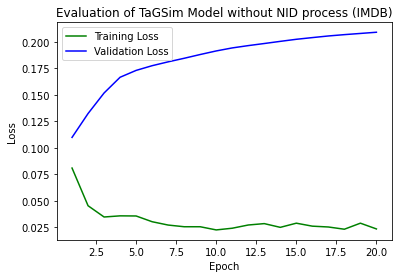


-------Model testing---------.


Model test error: 0.2305271233121554


In [20]:
import torch
import numpy as np


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, tensor_neurons, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.input_dim = input_dim
        self.tensor_neurons = tensor_neurons
        self.setup_weights()
        self.init_parameters()

    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(torch.Tensor(self.input_dim, self.input_dim, self.tensor_neurons))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.tensor_neurons)
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


def graph_aggregation_layer(input, adj):
    result = torch.mm(adj, input)
    return result


class TaGSim(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim, self).__init__()
        self.number_of_node_labels = len(number_of_node_labels)
        self.number_of_edge_labels = len(number_of_edge_labels)
        self.node_type = number_of_node_labels
        self.edge_type = number_of_edge_labels
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.setup_layers()

    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        # self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_edge_labels)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        # self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_in = torch.nn.Linear(8, 4)
        # self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)

        return hidden1, hidden2

    def forward(self, label_multiset):
        adj_1, adj_2 = torch.FloatTensor(np.array(label_multiset["node_index_1"].todense())), torch.FloatTensor(
            np.array(label_multiset["node_index_2"].todense()))
        edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
        node_features_1, node_features_2 = label_multiset["node_features_1"], label_multiset["node_features_2"]
        edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

        #gal
        graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, node_features_1)  #original graph node
        graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, node_features_2)  #generated graph node
        edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
        edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge
        #node level embedding Concatenation
        graph1_01concat = torch.cat([node_features_1, graph1_hidden1], dim=1)
        graph2_01concat = torch.cat([node_features_2, graph2_hidden1], dim=1)
        graph1_12concat = torch.cat([graph1_hidden1, graph1_hidden2], dim=1)
        graph2_12concat = torch.cat([graph2_hidden1, graph2_hidden2], dim=1)
        #graph pooling: node Sum
        graph1_01pooled = torch.sum(graph1_01concat, dim=0).unsqueeze(1)
        graph2_01pooled = torch.sum(graph2_01concat, dim=0).unsqueeze(1)
        graph1_12pooled = torch.sum(graph1_12concat, dim=0).unsqueeze(1)
        graph2_12pooled = torch.sum(graph2_12concat, dim=0).unsqueeze(1)
        #edge level embedding Concatenation
        edge1_01concat = torch.cat([edge_features_1, edge1_hidden1], dim=1)
        edge2_01concat = torch.cat([edge_features_2, edge2_hidden1], dim=1)
        #graph pooling: edge Sum
        edge1_01pooled = torch.sum(edge1_01concat, dim=0).unsqueeze(1)
        edge2_01pooled = torch.sum(edge2_01concat, dim=0).unsqueeze(1)

        # scores_nc = self.tensor_network_nc(graph1_01pooled, graph2_01pooled)
        # scores_nc = torch.t(scores_nc)
        #
        # scores_nc = torch.nn.functional.relu(self.fully_connected_first_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_second_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_third_nc(scores_nc))
        # score_nc = torch.sigmoid(self.scoring_layer_nc(scores_nc))

        # scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
        # scores_in = torch.t(scores_in)
        #
        # scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
        # scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
        # scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
        # score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

        # scores_ie = self.tensor_network_ie(graph1_12pooled, graph2_12pooled)
        # scores_ie = torch.t(scores_ie)
        #
        # scores_ie = torch.nn.functional.relu(self.fully_connected_first_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_second_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_third_ie(scores_ie))
        # score_ie = torch.sigmoid(self.scoring_layer_ie(scores_ie))

        scores_ec = self.tensor_network_ec(edge1_01pooled, edge2_01pooled)
        scores_ec = torch.t(scores_ec)

        scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
        score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

        return torch.cat([score_ec], dim=1)

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']
        #node and edge info of pair graph
        node_info1 = nx.get_node_attributes(graph1, 'label')
        node_info2 = nx.get_node_attributes(graph2, 'label')
        edge_info1 = nx.get_edge_attributes(graph1, 'id')
        edge_info2 = nx.get_edge_attributes(graph2, 'id')
        nodes1 = list(graph1.nodes())
        nodes2 = list(graph2.nodes())
        edges1 = list(graph1.edges())
        edges2 = list(graph2.edges())

        label_multiset = dict()
        node_features_1, node_features_2, edge_features_1, edge_features_2, edge_adj_1, edge_adj_2 = [], [], [], [], [], []

        for i in graph1.nodes():
            node_features_1.append([1.0 if node_info1[i] == node else 0.0 for node in self.node_type])
        for i in graph2.nodes():
            node_features_2.append([1.0 if node_info2[i] == node else 0.0 for node in self.node_type])
        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        for i in edges1:
            edge_features_1.append([1.0 if edge_info1[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges1:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_1.append(adj_row)
        for i in edges2:
            edge_features_2.append([1.0 if edge_info2[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges2:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_2.append(adj_row)
        edge_features_1, edge_features_2 = torch.FloatTensor(np.array(edge_features_1)), torch.FloatTensor(
            np.array(edge_features_2))
        edge_adj_1, edge_adj_2 = torch.FloatTensor(np.array(edge_adj_1)), torch.FloatTensor(np.array(edge_adj_2))

        label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
            graph1), nx.adjacency_matrix(graph2)
        label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (len(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset


import matplotlib.pyplot as plt

epochs = 20
tensor_neurons = 16
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.0
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
test_scores = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []

#model training
for epoch in range(epochs):
    random.shuffle(train_pairs)
    batches = []
    for graph in range(0, len(train_pairs), batch_size):
        batches.append(train_pairs[graph:graph + batch_size])

    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))
    # testing
    model.eval()
    for n in test_pairs:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)

#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Loss')
plt.title('Evaluation of TaGSim Model without NID process (' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))

#Model without NID


-------Model training---------.

Iteration 0 loss:  0.155412957072258
Iteration 1 loss:  0.13951422274112701
Iteration 2 loss:  0.1298229694366455
Iteration 3 loss:  0.10504843294620514
Iteration 4 loss:  0.0986267551779747
Iteration 5 loss:  0.08879538625478745
Iteration 6 loss:  0.08836612105369568
Iteration 7 loss:  0.07076223194599152
Iteration 8 loss:  0.06616806983947754
Iteration 9 loss:  0.0553552508354187
Iteration 10 loss:  0.06387066841125488
Iteration 11 loss:  0.06420211493968964
Iteration 12 loss:  0.058968644589185715
Iteration 13 loss:  0.052529916167259216
Iteration 14 loss:  0.05089225620031357
Iteration 15 loss:  0.047879479825496674
Iteration 16 loss:  0.04128224402666092
Iteration 17 loss:  0.05067940801382065
Iteration 18 loss:  0.04635543003678322
Iteration 19 loss:  0.04657942553361257
Iteration 20 loss:  0.04431881010532379
Iteration 21 loss:  0.044014137238264084
Iteration 22 loss:  0.04603849723935127
Iteration 23 loss:  0.048517387360334396
Iteration 24 los

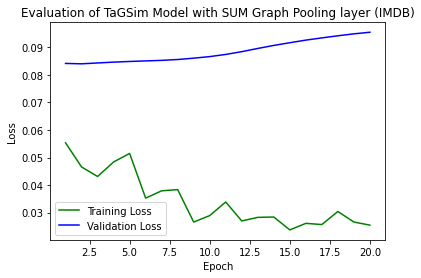


-------Model testing---------.


Model test error: 0.10657592008427097


In [21]:
import torch
import numpy as np


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, tensor_neurons, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.input_dim = input_dim
        self.tensor_neurons = tensor_neurons
        self.setup_weights()
        self.init_parameters()

    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(torch.Tensor(self.input_dim, self.input_dim, self.tensor_neurons))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.tensor_neurons)
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


def graph_aggregation_layer(input, adj):
    result = torch.mm(adj, input)
    return result


class TaGSim(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim, self).__init__()
        self.number_of_node_labels = len(number_of_node_labels)
        self.number_of_edge_labels = len(number_of_edge_labels)
        self.node_type = number_of_node_labels
        self.edge_type = number_of_edge_labels
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.setup_layers()

    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_edge_labels)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)

        return hidden1, hidden2

    def forward(self, label_multiset):
        adj_1, adj_2 = torch.FloatTensor(np.array(label_multiset["node_index_1"].todense())), torch.FloatTensor(
            np.array(label_multiset["node_index_2"].todense()))
        edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
        node_features_1, node_features_2 = label_multiset["node_features_1"], label_multiset["node_features_2"]
        edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

        #gal
        graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, node_features_1)  #original graph node
        graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, node_features_2)  #generated graph node
        edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
        edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge
        #node level embedding Concatenation
        graph1_01concat = torch.cat([node_features_1, graph1_hidden1], dim=1)
        graph2_01concat = torch.cat([node_features_2, graph2_hidden1], dim=1)
        graph1_12concat = torch.cat([graph1_hidden1, graph1_hidden2], dim=1)
        graph2_12concat = torch.cat([graph2_hidden1, graph2_hidden2], dim=1)
        #graph pooling: node Sum
        graph1_01pooled = torch.sum(graph1_01concat, dim=0).unsqueeze(1)
        graph2_01pooled = torch.sum(graph2_01concat, dim=0).unsqueeze(1)
        graph1_12pooled = torch.sum(graph1_12concat, dim=0).unsqueeze(1)
        graph2_12pooled = torch.sum(graph2_12concat, dim=0).unsqueeze(1)
        #edge level embedding Concatenation
        edge1_01concat = torch.cat([edge_features_1, edge1_hidden1], dim=1)
        edge2_01concat = torch.cat([edge_features_2, edge2_hidden1], dim=1)
        #graph pooling: edge Sum
        edge1_01pooled = torch.sum(edge1_01concat, dim=0).unsqueeze(1)
        edge2_01pooled = torch.sum(edge2_01concat, dim=0).unsqueeze(1)

        # scores_nc = self.tensor_network_nc(graph1_01pooled, graph2_01pooled)
        # scores_nc = torch.t(scores_nc)
        #
        # scores_nc = torch.nn.functional.relu(self.fully_connected_first_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_second_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_third_nc(scores_nc))
        # score_nc = torch.sigmoid(self.scoring_layer_nc(scores_nc))

        scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
        scores_in = torch.t(scores_in)

        scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
        score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

        # scores_ie = self.tensor_network_ie(graph1_12pooled, graph2_12pooled)
        # scores_ie = torch.t(scores_ie)
        #
        # scores_ie = torch.nn.functional.relu(self.fully_connected_first_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_second_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_third_ie(scores_ie))
        # score_ie = torch.sigmoid(self.scoring_layer_ie(scores_ie))

        scores_ec = self.tensor_network_ec(edge1_01pooled, edge2_01pooled)
        scores_ec = torch.t(scores_ec)

        scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
        score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

        return torch.cat([ score_in,  score_ec], dim=1)

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']
        #node and edge info of pair graph
        node_info1 = nx.get_node_attributes(graph1, 'label')
        node_info2 = nx.get_node_attributes(graph2, 'label')
        edge_info1 = nx.get_edge_attributes(graph1, 'id')
        edge_info2 = nx.get_edge_attributes(graph2, 'id')
        nodes1 = list(graph1.nodes())
        nodes2 = list(graph2.nodes())
        edges1 = list(graph1.edges())
        edges2 = list(graph2.edges())

        label_multiset = dict()
        node_features_1, node_features_2, edge_features_1, edge_features_2, edge_adj_1, edge_adj_2 = [], [], [], [], [], []

        for i in graph1.nodes():
            node_features_1.append([1.0 if node_info1[i] == node else 0.0 for node in self.node_type])
        for i in graph2.nodes():
            node_features_2.append([1.0 if node_info2[i] == node else 0.0 for node in self.node_type])
        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        for i in edges1:
            edge_features_1.append([1.0 if edge_info1[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges1:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_1.append(adj_row)
        for i in edges2:
            edge_features_2.append([1.0 if edge_info2[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges2:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_2.append(adj_row)
        edge_features_1, edge_features_2 = torch.FloatTensor(np.array(edge_features_1)), torch.FloatTensor(
            np.array(edge_features_2))
        edge_adj_1, edge_adj_2 = torch.FloatTensor(np.array(edge_adj_1)), torch.FloatTensor(np.array(edge_adj_2))

        label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
            graph1), nx.adjacency_matrix(graph2)
        label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (len(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset


import matplotlib.pyplot as plt

epochs = 20
tensor_neurons = 16
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.0
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
test_scores = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []

#model training
for epoch in range(epochs):
    random.shuffle(train_pairs)
    batches = []
    for graph in range(0, len(train_pairs), batch_size):
        batches.append(train_pairs[graph:graph + batch_size])

    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))
    # testing
    model.eval()
    for n in test_pairs:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)

#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Loss')
plt.title('Evaluation of TaGSim Model with SUM Graph Pooling layer (' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))

#MAX Pooling


-------Model training---------.

Iteration 0 loss:  0.07919812947511673
Iteration 1 loss:  0.07785609364509583
Iteration 2 loss:  0.08586514741182327
Iteration 3 loss:  0.08247215300798416
Iteration 4 loss:  0.0831141546368599
Iteration 5 loss:  0.08134765923023224
Iteration 6 loss:  0.07808508723974228
Iteration 7 loss:  0.0814896672964096
Iteration 8 loss:  0.08008097857236862
Iteration 9 loss:  0.08474807937939961
Iteration 10 loss:  0.083806112408638
Iteration 11 loss:  0.0813029482960701
Iteration 12 loss:  0.07546649873256683
Iteration 13 loss:  0.07536724954843521
Iteration 14 loss:  0.0840739756822586
Iteration 15 loss:  0.08312353491783142
Iteration 16 loss:  0.07396095991134644
Iteration 17 loss:  0.07698941975831985
Iteration 18 loss:  0.07993099838495255
Iteration 19 loss:  0.08134606977303822
Iteration 20 loss:  0.07784949988126755
Iteration 21 loss:  0.07736273109912872
Iteration 22 loss:  0.07902617752552032
Iteration 23 loss:  0.07531815767288208
Iteration 24 loss:  0.

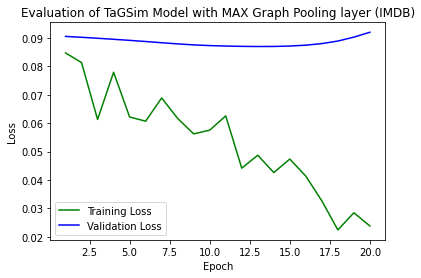


-------Model testing---------.


Model test error: 0.1247382732698073


In [22]:
import torch
import numpy as np


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, tensor_neurons, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.input_dim = input_dim
        self.tensor_neurons = tensor_neurons
        self.setup_weights()
        self.init_parameters()

    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(torch.Tensor(self.input_dim, self.input_dim, self.tensor_neurons))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.tensor_neurons)
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


def graph_aggregation_layer(input, adj):
    result = torch.mm(adj, input)
    return result


class TaGSim(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim, self).__init__()
        self.number_of_node_labels = len(number_of_node_labels)
        self.number_of_edge_labels = len(number_of_edge_labels)
        self.node_type = number_of_node_labels
        self.edge_type = number_of_edge_labels
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.setup_layers()

    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_edge_labels)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)

        return hidden1, hidden2

    def forward(self, label_multiset):
        adj_1, adj_2 = torch.FloatTensor(np.array(label_multiset["node_index_1"].todense())), torch.FloatTensor(
            np.array(label_multiset["node_index_2"].todense()))
        edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
        node_features_1, node_features_2 = label_multiset["node_features_1"], label_multiset["node_features_2"]
        edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

        #gal
        graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, node_features_1)  #original graph node
        graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, node_features_2)  #generated graph node
        edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
        edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge
        #node level embedding Concatenation
        graph1_01concat = torch.cat([node_features_1, graph1_hidden1], dim=1)
        graph2_01concat = torch.cat([node_features_2, graph2_hidden1], dim=1)
        graph1_12concat = torch.cat([graph1_hidden1, graph1_hidden2], dim=1)
        graph2_12concat = torch.cat([graph2_hidden1, graph2_hidden2], dim=1)
        #graph pooling: node Sum
        graph1_01pooled, max_idxs = torch.max(graph1_01concat, 0)
        graph2_01pooled, max_idxs = torch.max(graph2_01concat, 0)
        graph1_12pooled, max_idxs = torch.max(graph1_12concat, 0)
        graph2_12pooled, max_idxs = torch.max(graph2_12concat, 0)

        graph1_01pooled = torch.unsqueeze(graph1_01pooled, 1)
        graph2_01pooled = torch.unsqueeze(graph2_01pooled, 1)
        graph1_12pooled = torch.unsqueeze(graph1_12pooled, 1)
        graph2_12pooled = torch.unsqueeze(graph2_12pooled, 1)

        #edge level embedding Concatenation
        edge1_01concat = torch.cat([edge_features_1, edge1_hidden1], dim=1)
        edge2_01concat = torch.cat([edge_features_2, edge2_hidden1], dim=1)
        #graph pooling: edge Sum
        edge1_01pooled, max_idxs = torch.max(edge1_01concat, 0)
        edge2_01pooled, max_idxs = torch.max(edge2_01concat, 0)
        edge1_01pooled = torch.unsqueeze(edge1_01pooled, 1)
        edge2_01pooled = torch.unsqueeze(edge2_01pooled, 1)

        # scores_nc = self.tensor_network_nc(graph1_01pooled, graph2_01pooled)
        # scores_nc = torch.t(scores_nc)
        #
        # scores_nc = torch.nn.functional.relu(self.fully_connected_first_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_second_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_third_nc(scores_nc))
        # score_nc = torch.sigmoid(self.scoring_layer_nc(scores_nc))

        scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
        scores_in = torch.t(scores_in)

        scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
        score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

        # scores_ie = self.tensor_network_ie(graph1_12pooled, graph2_12pooled)
        # scores_ie = torch.t(scores_ie)
        #
        # scores_ie = torch.nn.functional.relu(self.fully_connected_first_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_second_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_third_ie(scores_ie))
        # score_ie = torch.sigmoid(self.scoring_layer_ie(scores_ie))

        scores_ec = self.tensor_network_ec(edge1_01pooled, edge2_01pooled)
        scores_ec = torch.t(scores_ec)

        scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
        score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

        return torch.cat([ score_in,  score_ec], dim=1)

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']
        #node and edge info of pair graph
        node_info1 = nx.get_node_attributes(graph1, 'label')
        node_info2 = nx.get_node_attributes(graph2, 'label')
        edge_info1 = nx.get_edge_attributes(graph1, 'id')
        edge_info2 = nx.get_edge_attributes(graph2, 'id')
        nodes1 = list(graph1.nodes())
        nodes2 = list(graph2.nodes())
        edges1 = list(graph1.edges())
        edges2 = list(graph2.edges())

        label_multiset = dict()
        node_features_1, node_features_2, edge_features_1, edge_features_2, edge_adj_1, edge_adj_2 = [], [], [], [], [], []

        for i in graph1.nodes():
            node_features_1.append([1.0 if node_info1[i] == node else 0.0 for node in self.node_type])
        for i in graph2.nodes():
            node_features_2.append([1.0 if node_info2[i] == node else 0.0 for node in self.node_type])
        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        for i in edges1:
            edge_features_1.append([1.0 if edge_info1[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges1:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_1.append(adj_row)
        for i in edges2:
            edge_features_2.append([1.0 if edge_info2[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges2:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_2.append(adj_row)
        edge_features_1, edge_features_2 = torch.FloatTensor(np.array(edge_features_1)), torch.FloatTensor(
            np.array(edge_features_2))
        edge_adj_1, edge_adj_2 = torch.FloatTensor(np.array(edge_adj_1)), torch.FloatTensor(np.array(edge_adj_2))

        label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
            graph1), nx.adjacency_matrix(graph2)
        label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (len(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset


import matplotlib.pyplot as plt

epochs = 20
tensor_neurons = 16
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.0
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
test_scores = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []

#model training
for epoch in range(epochs):
    random.shuffle(train_pairs)
    batches = []
    for graph in range(0, len(train_pairs), batch_size):
        batches.append(train_pairs[graph:graph + batch_size])

    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))
    # testing
    model.eval()
    for n in test_pairs:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)

#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Loss')
plt.title('Evaluation of TaGSim Model with MAX Graph Pooling layer (' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))

#MIN Pooling


-------Model training---------.

Iteration 0 loss:  0.10433503240346909
Iteration 1 loss:  0.10441343486309052
Iteration 2 loss:  0.09758713096380234
Iteration 3 loss:  0.09966062009334564
Iteration 4 loss:  0.1008688434958458
Iteration 5 loss:  0.10098244249820709
Iteration 6 loss:  0.0972660556435585
Iteration 7 loss:  0.09898737818002701
Iteration 8 loss:  0.09373898804187775
Iteration 9 loss:  0.10252836346626282
Iteration 10 loss:  0.0996306985616684
Iteration 11 loss:  0.09132909774780273
Iteration 12 loss:  0.09535548835992813
Iteration 13 loss:  0.09825370460748672
Iteration 14 loss:  0.09774383157491684
Iteration 15 loss:  0.09792430698871613
Iteration 16 loss:  0.10129789263010025
Iteration 17 loss:  0.10056010633707047
Iteration 18 loss:  0.08899158984422684
Iteration 19 loss:  0.08814532558123271
Iteration 20 loss:  0.09357201308012009
Iteration 21 loss:  0.09683867543935776
Iteration 22 loss:  0.0983228012919426
Iteration 23 loss:  0.0927148312330246
Iteration 24 loss:  0

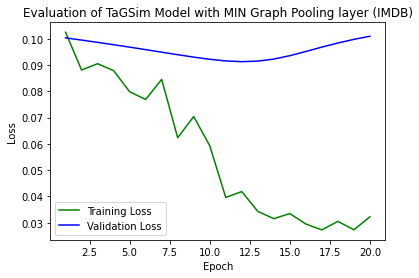


-------Model testing---------.


Model test error: 0.12355815868785915


In [23]:
import torch
import numpy as np


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, tensor_neurons, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.input_dim = input_dim
        self.tensor_neurons = tensor_neurons
        self.setup_weights()
        self.init_parameters()

    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(torch.Tensor(self.input_dim, self.input_dim, self.tensor_neurons))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.tensor_neurons)
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


def graph_aggregation_layer(input, adj):
    result = torch.mm(adj, input)
    return result


class TaGSim(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim, self).__init__()
        self.number_of_node_labels = len(number_of_node_labels)
        self.number_of_edge_labels = len(number_of_edge_labels)
        self.node_type = number_of_node_labels
        self.edge_type = number_of_edge_labels
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.setup_layers()

    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_edge_labels)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)

        return hidden1, hidden2

    def forward(self, label_multiset):
        adj_1, adj_2 = torch.FloatTensor(np.array(label_multiset["node_index_1"].todense())), torch.FloatTensor(
            np.array(label_multiset["node_index_2"].todense()))
        edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
        node_features_1, node_features_2 = label_multiset["node_features_1"], label_multiset["node_features_2"]
        edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

        #gal
        graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, node_features_1)  #original graph node
        graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, node_features_2)  #generated graph node
        edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
        edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge
        #node level embedding Concatenation
        graph1_01concat = torch.cat([node_features_1, graph1_hidden1], dim=1)
        graph2_01concat = torch.cat([node_features_2, graph2_hidden1], dim=1)
        graph1_12concat = torch.cat([graph1_hidden1, graph1_hidden2], dim=1)
        graph2_12concat = torch.cat([graph2_hidden1, graph2_hidden2], dim=1)
        #graph pooling: node Sum
        graph1_01pooled, min_idxs = torch.min(graph1_01concat, 0)
        graph2_01pooled, min_idxs = torch.min(graph2_01concat, 0)
        graph1_12pooled, min_idxs = torch.min(graph1_12concat, 0)
        graph2_12pooled, min_idxs = torch.min(graph2_12concat, 0)

        graph1_01pooled = torch.unsqueeze(graph1_01pooled, 1)
        graph2_01pooled = torch.unsqueeze(graph2_01pooled, 1)
        graph1_12pooled = torch.unsqueeze(graph1_12pooled, 1)
        graph2_12pooled = torch.unsqueeze(graph2_12pooled, 1)

        #edge level embedding Concatenation
        edge1_01concat = torch.cat([edge_features_1, edge1_hidden1], dim=1)
        edge2_01concat = torch.cat([edge_features_2, edge2_hidden1], dim=1)
        #graph pooling: edge Sum
        edge1_01pooled, min_idxs = torch.min(edge1_01concat, 0)
        edge2_01pooled, min_idxs = torch.min(edge2_01concat, 0)
        edge1_01pooled = torch.unsqueeze(edge1_01pooled, 1)
        edge2_01pooled = torch.unsqueeze(edge2_01pooled, 1)

        # scores_nc = self.tensor_network_nc(graph1_01pooled, graph2_01pooled)
        # scores_nc = torch.t(scores_nc)
        #
        # scores_nc = torch.nn.functional.relu(self.fully_connected_first_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_second_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_third_nc(scores_nc))
        # score_nc = torch.sigmoid(self.scoring_layer_nc(scores_nc))

        scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
        scores_in = torch.t(scores_in)

        scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
        score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

        # scores_ie = self.tensor_network_ie(graph1_12pooled, graph2_12pooled)
        # scores_ie = torch.t(scores_ie)
        #
        # scores_ie = torch.nn.functional.relu(self.fully_connected_first_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_second_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_third_ie(scores_ie))
        # score_ie = torch.sigmoid(self.scoring_layer_ie(scores_ie))

        scores_ec = self.tensor_network_ec(edge1_01pooled, edge2_01pooled)
        scores_ec = torch.t(scores_ec)

        scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
        score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

        return torch.cat([ score_in,  score_ec], dim=1)

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']
        #node and edge info of pair graph
        node_info1 = nx.get_node_attributes(graph1, 'label')
        node_info2 = nx.get_node_attributes(graph2, 'label')
        edge_info1 = nx.get_edge_attributes(graph1, 'id')
        edge_info2 = nx.get_edge_attributes(graph2, 'id')
        nodes1 = list(graph1.nodes())
        nodes2 = list(graph2.nodes())
        edges1 = list(graph1.edges())
        edges2 = list(graph2.edges())

        label_multiset = dict()
        node_features_1, node_features_2, edge_features_1, edge_features_2, edge_adj_1, edge_adj_2 = [], [], [], [], [], []

        for i in graph1.nodes():
            node_features_1.append([1.0 if node_info1[i] == node else 0.0 for node in self.node_type])
        for i in graph2.nodes():
            node_features_2.append([1.0 if node_info2[i] == node else 0.0 for node in self.node_type])
        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        for i in edges1:
            edge_features_1.append([1.0 if edge_info1[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges1:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_1.append(adj_row)
        for i in edges2:
            edge_features_2.append([1.0 if edge_info2[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges2:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_2.append(adj_row)
        edge_features_1, edge_features_2 = torch.FloatTensor(np.array(edge_features_1)), torch.FloatTensor(
            np.array(edge_features_2))
        edge_adj_1, edge_adj_2 = torch.FloatTensor(np.array(edge_adj_1)), torch.FloatTensor(np.array(edge_adj_2))

        label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
            graph1), nx.adjacency_matrix(graph2)
        label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (len(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset


import matplotlib.pyplot as plt

epochs = 20
tensor_neurons = 16
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.0
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
test_scores = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []

#model training
for epoch in range(epochs):
    random.shuffle(train_pairs)
    batches = []
    for graph in range(0, len(train_pairs), batch_size):
        batches.append(train_pairs[graph:graph + batch_size])

    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))
    # testing
    model.eval()
    for n in test_pairs:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)

#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Loss')
plt.title('Evaluation of TaGSim Model with MIN Graph Pooling layer (' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))

#MEAN Pooling


-------Model training---------.

Iteration 0 loss:  0.08737308531999588
Iteration 1 loss:  0.09081749618053436
Iteration 2 loss:  0.09232860058546066
Iteration 3 loss:  0.08736100792884827
Iteration 4 loss:  0.08781496435403824
Iteration 5 loss:  0.08036080002784729
Iteration 6 loss:  0.07977058738470078
Iteration 7 loss:  0.08350809663534164
Iteration 8 loss:  0.07642660290002823
Iteration 9 loss:  0.08531613151232402
Iteration 10 loss:  0.08349568396806717
Iteration 11 loss:  0.08439429104328156
Iteration 12 loss:  0.07973678410053253
Iteration 13 loss:  0.0807994157075882
Iteration 14 loss:  0.08391135931015015
Iteration 15 loss:  0.07890495657920837
Iteration 16 loss:  0.08623793721199036
Iteration 17 loss:  0.0723639652132988
Iteration 18 loss:  0.08032073825597763
Iteration 19 loss:  0.07849603394667308
Iteration 20 loss:  0.06641340255737305
Iteration 21 loss:  0.07298247516155243
Iteration 22 loss:  0.07719767093658447
Iteration 23 loss:  0.06988810002803802
Iteration 24 loss:

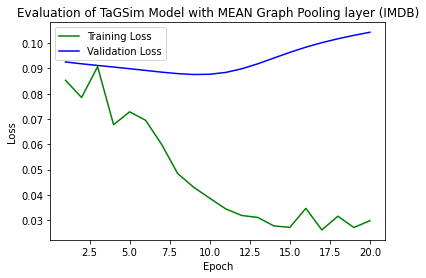


-------Model testing---------.


Model test error: 0.12760207045517746


In [24]:
import torch
import numpy as np


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, tensor_neurons, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.input_dim = input_dim
        self.tensor_neurons = tensor_neurons
        self.setup_weights()
        self.init_parameters()

    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(torch.Tensor(self.input_dim, self.input_dim, self.tensor_neurons))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.tensor_neurons)
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


def graph_aggregation_layer(input, adj):
    result = torch.mm(adj, input)
    return result


class TaGSim(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim, self).__init__()
        self.number_of_node_labels = len(number_of_node_labels)
        self.number_of_edge_labels = len(number_of_edge_labels)
        self.node_type = number_of_node_labels
        self.edge_type = number_of_edge_labels
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.setup_layers()

    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_edge_labels)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)

        return hidden1, hidden2

    def forward(self, label_multiset):
        adj_1, adj_2 = torch.FloatTensor(np.array(label_multiset["node_index_1"].todense())), torch.FloatTensor(
            np.array(label_multiset["node_index_2"].todense()))
        edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
        node_features_1, node_features_2 = label_multiset["node_features_1"], label_multiset["node_features_2"]
        edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

        #gal
        graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, node_features_1)  #original graph node
        graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, node_features_2)  #generated graph node
        edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
        edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge
        #node level embedding Concatenation
        graph1_01concat = torch.cat([node_features_1, graph1_hidden1], dim=1)
        graph2_01concat = torch.cat([node_features_2, graph2_hidden1], dim=1)
        graph1_12concat = torch.cat([graph1_hidden1, graph1_hidden2], dim=1)
        graph2_12concat = torch.cat([graph2_hidden1, graph2_hidden2], dim=1)
        #graph pooling: node Mean
        graph1_01pooled = torch.mean(graph1_01concat, 0)
        graph2_01pooled = torch.mean(graph2_01concat, 0)
        graph1_12pooled = torch.mean(graph1_12concat, 0)
        graph2_12pooled = torch.mean(graph2_12concat, 0)

        graph1_01pooled = torch.unsqueeze(graph1_01pooled, 1)
        graph2_01pooled = torch.unsqueeze(graph2_01pooled, 1)
        graph1_12pooled = torch.unsqueeze(graph1_12pooled, 1)
        graph2_12pooled = torch.unsqueeze(graph2_12pooled, 1)

        #edge level embedding Concatenation
        edge1_01concat = torch.cat([edge_features_1, edge1_hidden1], dim=1)
        edge2_01concat = torch.cat([edge_features_2, edge2_hidden1], dim=1)
        #graph pooling: edge Mean
        edge1_01pooled = torch.mean(edge1_01concat, 0)
        edge2_01pooled = torch.mean(edge2_01concat, 0)
        edge1_01pooled = torch.unsqueeze(edge1_01pooled, 1)
        edge2_01pooled = torch.unsqueeze(edge2_01pooled, 1)

        # scores_nc = self.tensor_network_nc(graph1_01pooled, graph2_01pooled)
        # scores_nc = torch.t(scores_nc)
        #
        # scores_nc = torch.nn.functional.relu(self.fully_connected_first_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_second_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_third_nc(scores_nc))
        # score_nc = torch.sigmoid(self.scoring_layer_nc(scores_nc))

        scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
        scores_in = torch.t(scores_in)

        scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
        score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

        # scores_ie = self.tensor_network_ie(graph1_12pooled, graph2_12pooled)
        # scores_ie = torch.t(scores_ie)
        #
        # scores_ie = torch.nn.functional.relu(self.fully_connected_first_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_second_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_third_ie(scores_ie))
        # score_ie = torch.sigmoid(self.scoring_layer_ie(scores_ie))

        scores_ec = self.tensor_network_ec(edge1_01pooled, edge2_01pooled)
        scores_ec = torch.t(scores_ec)

        scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
        score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

        return torch.cat([ score_in,  score_ec], dim=1)

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']
        #node and edge info of pair graph
        node_info1 = nx.get_node_attributes(graph1, 'label')
        node_info2 = nx.get_node_attributes(graph2, 'label')
        edge_info1 = nx.get_edge_attributes(graph1, 'id')
        edge_info2 = nx.get_edge_attributes(graph2, 'id')
        nodes1 = list(graph1.nodes())
        nodes2 = list(graph2.nodes())
        edges1 = list(graph1.edges())
        edges2 = list(graph2.edges())

        label_multiset = dict()
        node_features_1, node_features_2, edge_features_1, edge_features_2, edge_adj_1, edge_adj_2 = [], [], [], [], [], []

        for i in graph1.nodes():
            node_features_1.append([1.0 if node_info1[i] == node else 0.0 for node in self.node_type])
        for i in graph2.nodes():
            node_features_2.append([1.0 if node_info2[i] == node else 0.0 for node in self.node_type])
        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        for i in edges1:
            edge_features_1.append([1.0 if edge_info1[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges1:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_1.append(adj_row)
        for i in edges2:
            edge_features_2.append([1.0 if edge_info2[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges2:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_2.append(adj_row)
        edge_features_1, edge_features_2 = torch.FloatTensor(np.array(edge_features_1)), torch.FloatTensor(
            np.array(edge_features_2))
        edge_adj_1, edge_adj_2 = torch.FloatTensor(np.array(edge_adj_1)), torch.FloatTensor(np.array(edge_adj_2))

        label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
            graph1), nx.adjacency_matrix(graph2)
        label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (len(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset


import matplotlib.pyplot as plt

epochs = 20
tensor_neurons = 16
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.0
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
test_scores = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []

#model training
for epoch in range(epochs):
    random.shuffle(train_pairs)
    batches = []
    for graph in range(0, len(train_pairs), batch_size):
        batches.append(train_pairs[graph:graph + batch_size])

    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))
    # testing
    model.eval()
    for n in test_pairs:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)

#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Loss')
plt.title('Evaluation of TaGSim Model with MEAN Graph Pooling layer (' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))

#SUM Pooling


-------Model training---------.

Iteration 0 loss:  0.09324866533279419
Iteration 1 loss:  0.10059898346662521
Iteration 2 loss:  0.05952055752277374
Iteration 3 loss:  0.049609966576099396
Iteration 4 loss:  0.04333518072962761
Iteration 5 loss:  0.043746888637542725
Iteration 6 loss:  0.03624604642391205
Iteration 7 loss:  0.03472323343157768
Iteration 8 loss:  0.0325297974050045
Iteration 9 loss:  0.029561405380566914
Iteration 10 loss:  0.035171616822481155
Iteration 11 loss:  0.03098398819565773
Iteration 12 loss:  0.028678901493549347
Iteration 13 loss:  0.03555115684866905
Iteration 14 loss:  0.031149905174970627
Iteration 15 loss:  0.030152563005685806
Iteration 16 loss:  0.029949383810162544
Iteration 17 loss:  0.030836505815386772
Iteration 18 loss:  0.0245953481644392
Iteration 19 loss:  0.03387939433256785
Iteration 20 loss:  0.02862081490457058
Iteration 21 loss:  0.024751415476202965
Iteration 22 loss:  0.03278009593486786
Iteration 23 loss:  0.026215756312012672
Iterati

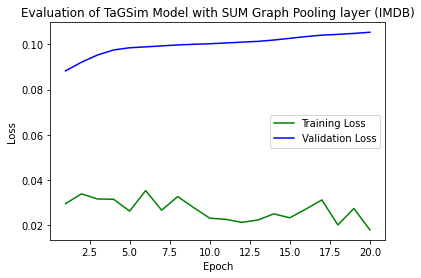


-------Model testing---------.


Model test error: 0.1152071249075622


In [25]:
import torch
import numpy as np


class TensorNetworkModule(torch.nn.Module):
    def __init__(self, tensor_neurons, input_dim):
        super(TensorNetworkModule, self).__init__()
        self.input_dim = input_dim
        self.tensor_neurons = tensor_neurons
        self.setup_weights()
        self.init_parameters()

    def setup_weights(self):
        self.weight_matrix = torch.nn.Parameter(torch.Tensor(self.input_dim, self.input_dim, self.tensor_neurons))
        self.weight_matrix_block = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 2 * self.input_dim))
        self.bias = torch.nn.Parameter(torch.Tensor(self.tensor_neurons, 1))

    def init_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight_matrix)
        torch.nn.init.xavier_uniform_(self.weight_matrix_block)
        torch.nn.init.xavier_uniform_(self.bias)

    def forward(self, embedding_1, embedding_2):
        scoring = torch.mm(torch.t(embedding_1), self.weight_matrix.view(self.input_dim, -1))
        scoring = scoring.view(self.input_dim, self.tensor_neurons)
        scoring = torch.mm(torch.t(scoring), embedding_2)
        combined_representation = torch.cat((embedding_1, embedding_2))
        block_scoring = torch.mm(self.weight_matrix_block, combined_representation)
        scores = torch.nn.functional.relu(scoring + block_scoring + self.bias)
        return scores


def graph_aggregation_layer(input, adj):
    result = torch.mm(adj, input)
    return result


class TaGSim(torch.nn.Module):
    def __init__(self, number_of_node_labels, number_of_edge_labels, tensor_neurons, bottle_neck_neurons):
        super(TaGSim, self).__init__()
        self.number_of_node_labels = len(number_of_node_labels)
        self.number_of_edge_labels = len(number_of_edge_labels)
        self.node_type = number_of_node_labels
        self.edge_type = number_of_edge_labels
        self.tensor_neurons = tensor_neurons
        self.bottle_neck_neurons = bottle_neck_neurons
        self.setup_layers()

    def setup_layers(self):
        self.feature_count = self.tensor_neurons

        # self.tensor_network_nc = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_in = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        # self.tensor_network_ie = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_node_labels)
        self.tensor_network_ec = TensorNetworkModule(self.tensor_neurons, 2 * self.number_of_edge_labels)

        # self.fully_connected_first_nc = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_nc = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_nc = torch.nn.Linear(8, 4)
        # self.scoring_layer_nc = torch.nn.Linear(4, 1)

        self.fully_connected_first_in = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_in = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_in = torch.nn.Linear(8, 4)
        self.scoring_layer_in = torch.nn.Linear(4, 1)

        # self.fully_connected_first_ie = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        # self.fully_connected_second_ie = torch.nn.Linear(self.bottle_neck_neurons, 8)
        # self.fully_connected_third_ie = torch.nn.Linear(8, 4)
        # self.scoring_layer_ie = torch.nn.Linear(4, 1)

        self.fully_connected_first_ec = torch.nn.Linear(self.feature_count, self.bottle_neck_neurons)
        self.fully_connected_second_ec = torch.nn.Linear(self.bottle_neck_neurons, 8)
        self.fully_connected_third_ec = torch.nn.Linear(8, 4)
        self.scoring_layer_ec = torch.nn.Linear(4, 1)

    def gal_pass(self, edge_index, features):
        hidden1 = graph_aggregation_layer(features, edge_index)
        hidden2 = graph_aggregation_layer(hidden1, edge_index)

        return hidden1, hidden2

    def forward(self, label_multiset):
        adj_1, adj_2 = torch.FloatTensor(np.array(label_multiset["node_index_1"].todense())), torch.FloatTensor(
            np.array(label_multiset["node_index_2"].todense()))
        edge_adj_1, edge_adj_2 = label_multiset["edge_adj_1"], label_multiset["edge_adj_2"]
        node_features_1, node_features_2 = label_multiset["node_features_1"], label_multiset["node_features_2"]
        edge_features_1, edge_features_2 = label_multiset["edge_features_1"], label_multiset["edge_features_2"]

        #gal
        graph1_hidden1, graph1_hidden2 = self.gal_pass(adj_1, node_features_1)  #original graph node
        graph2_hidden1, graph2_hidden2 = self.gal_pass(adj_2, node_features_2)  #generated graph node
        edge1_hidden1, edge1_hidden2 = self.gal_pass(edge_adj_1, edge_features_1)  #original edge node
        edge2_hidden1, edge2_hidden2 = self.gal_pass(edge_adj_2, edge_features_2)  #generated graph edge
        #node level embedding Concatenation
        graph1_01concat = torch.cat([node_features_1, graph1_hidden1], dim=1)
        graph2_01concat = torch.cat([node_features_2, graph2_hidden1], dim=1)
        graph1_12concat = torch.cat([graph1_hidden1, graph1_hidden2], dim=1)
        graph2_12concat = torch.cat([graph2_hidden1, graph2_hidden2], dim=1)
        #graph pooling: node Sum
        graph1_01pooled = torch.sum(graph1_01concat, dim=0).unsqueeze(1)
        graph2_01pooled = torch.sum(graph2_01concat, dim=0).unsqueeze(1)
        graph1_12pooled = torch.sum(graph1_12concat, dim=0).unsqueeze(1)
        graph2_12pooled = torch.sum(graph2_12concat, dim=0).unsqueeze(1)
        #edge level embedding Concatenation
        edge1_01concat = torch.cat([edge_features_1, edge1_hidden1], dim=1)
        edge2_01concat = torch.cat([edge_features_2, edge2_hidden1], dim=1)
        #graph pooling: edge Sum
        edge1_01pooled = torch.sum(edge1_01concat, dim=0).unsqueeze(1)
        edge2_01pooled = torch.sum(edge2_01concat, dim=0).unsqueeze(1)

        # scores_nc = self.tensor_network_nc(graph1_01pooled, graph2_01pooled)
        # scores_nc = torch.t(scores_nc)
        #
        # scores_nc = torch.nn.functional.relu(self.fully_connected_first_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_second_nc(scores_nc))
        # scores_nc = torch.nn.functional.relu(self.fully_connected_third_nc(scores_nc))
        # score_nc = torch.sigmoid(self.scoring_layer_nc(scores_nc))

        scores_in = self.tensor_network_in(graph1_01pooled, graph2_01pooled)
        scores_in = torch.t(scores_in)

        scores_in = torch.nn.functional.relu(self.fully_connected_first_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_second_in(scores_in))
        scores_in = torch.nn.functional.relu(self.fully_connected_third_in(scores_in))
        score_in = torch.sigmoid(self.scoring_layer_in(scores_in))

        # scores_ie = self.tensor_network_ie(graph1_12pooled, graph2_12pooled)
        # scores_ie = torch.t(scores_ie)
        #
        # scores_ie = torch.nn.functional.relu(self.fully_connected_first_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_second_ie(scores_ie))
        # scores_ie = torch.nn.functional.relu(self.fully_connected_third_ie(scores_ie))
        # score_ie = torch.sigmoid(self.scoring_layer_ie(scores_ie))

        scores_ec = self.tensor_network_ec(edge1_01pooled, edge2_01pooled)
        scores_ec = torch.t(scores_ec)

        scores_ec = torch.nn.functional.relu(self.fully_connected_first_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_second_ec(scores_ec))
        scores_ec = torch.nn.functional.relu(self.fully_connected_third_ec(scores_ec))
        score_ec = torch.sigmoid(self.scoring_layer_ec(scores_ec))

        return torch.cat([ score_in,  score_ec], dim=1)

    def transform_label_multiset(self, graph_pair, type_specified=True):
        graph1 = graph_pair['graph_pair'][0]
        graph2 = graph_pair['graph_pair'][1]
        ged = graph_pair['ged']
        #node and edge info of pair graph
        node_info1 = nx.get_node_attributes(graph1, 'label')
        node_info2 = nx.get_node_attributes(graph2, 'label')
        edge_info1 = nx.get_edge_attributes(graph1, 'id')
        edge_info2 = nx.get_edge_attributes(graph2, 'id')
        nodes1 = list(graph1.nodes())
        nodes2 = list(graph2.nodes())
        edges1 = list(graph1.edges())
        edges2 = list(graph2.edges())

        label_multiset = dict()
        node_features_1, node_features_2, edge_features_1, edge_features_2, edge_adj_1, edge_adj_2 = [], [], [], [], [], []

        for i in graph1.nodes():
            node_features_1.append([1.0 if node_info1[i] == node else 0.0 for node in self.node_type])
        for i in graph2.nodes():
            node_features_2.append([1.0 if node_info2[i] == node else 0.0 for node in self.node_type])
        node_features_1, node_features_2 = torch.FloatTensor(np.array(node_features_1)), torch.FloatTensor(
            np.array(node_features_2))

        for i in edges1:
            edge_features_1.append([1.0 if edge_info1[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges1:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_1.append(adj_row)
        for i in edges2:
            edge_features_2.append([1.0 if edge_info2[i] == edge else 0.0 for edge in self.edge_type])
            adj_row = []
            for d in edges2:
                if (i == d):
                    adj_row.append(0.0)
                    continue
                if ((i[0] in d) | (i[1] in d)):
                    adj_row.append(1.0)
                else:
                    adj_row.append(0.0)
            edge_adj_2.append(adj_row)
        edge_features_1, edge_features_2 = torch.FloatTensor(np.array(edge_features_1)), torch.FloatTensor(
            np.array(edge_features_2))
        edge_adj_1, edge_adj_2 = torch.FloatTensor(np.array(edge_adj_1)), torch.FloatTensor(np.array(edge_adj_2))

        label_multiset["node_index_1"], label_multiset["node_index_2"] = nx.adjacency_matrix(
            graph1), nx.adjacency_matrix(graph2)
        label_multiset["node_features_1"], label_multiset["node_features_2"] = node_features_1, node_features_2
        label_multiset["edge_features_1"], label_multiset["edge_features_2"] = edge_features_1, edge_features_2
        label_multiset["edge_adj_1"], label_multiset["edge_adj_2"] = edge_adj_1, edge_adj_2

        #ged normalisation
        if (type_specified):  # for training
            avg_node_number = 0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes())
            norm_ged = [n / avg_node_number for n in ged]
            norm_ged = np.array(norm_ged)
            label_multiset["target"] = torch.from_numpy(np.exp(-norm_ged)).view(1, -1).float()

            norm_gt_ged = (len(ged)) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()
        else:  # for testing
            norm_gt_ged = (ged) / (0.5 * (graph1.number_of_nodes() + graph2.number_of_nodes()))
            label_multiset["gt_ged"] = torch.from_numpy(np.exp(-norm_gt_ged).reshape(1, 1)).view(1, -1).float()

        return label_multiset


import matplotlib.pyplot as plt

epochs = 20
tensor_neurons = 16
bottle_neck_neurons = 16
batch_size = 128
dropout = 0.0
lr = 0.001
weight_decay = 0.0

Node_Types = ['1']
Edge_Types = ['1']
#collection global node label and edge label info

print("\n-------Model training---------.\n")

model = TaGSim(Node_Types, Edge_Types, tensor_neurons, bottle_neck_neurons)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
iteration = 0

visual_loss_train = []
test_scores = []
visual_loss_test = []
train_pair = []
test_pair = []
epo = []

#model training
for epoch in range(epochs):
    random.shuffle(train_pairs)
    batches = []
    for graph in range(0, len(train_pairs), batch_size):
        batches.append(train_pairs[graph:graph + batch_size])

    for batch in batches:
        model.train()
        optimizer.zero_grad()
        losses = 0
        for graph_pair in batch:
            data = model.transform_label_multiset(graph_pair)
            prediction = model(data)
            losses += torch.nn.functional.mse_loss(data["target"], prediction)

        losses.backward(retain_graph=True)
        optimizer.step()
        loss = losses.item()
        print('Iteration', iteration, 'loss: ', loss / len(batch))
        iteration += 1

    visual_loss_train.append(loss / len(batch))
    # testing
    model.eval()
    for n in test_pairs:
        graph1 = n['graph_pair'][0]  #updated_test
        graph2 = n['graph_pair'][1]  #updated_test
        ged = int(n['gt_ged'])
        tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
        data = model.transform_label_multiset(tem_data, type_specified=False)
        prediction = model(data)
        prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
        current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
        test_scores.append(current_error.data.item())
    visual_loss_test.append(sum(test_scores) / len(test_scores))
    epo.append(epoch + 1)

#visualization of traning and testing loss
plt.plot(epo, visual_loss_train, 'g', label='Training Loss')
plt.plot(epo, visual_loss_test, 'b', label='Validation Loss')
plt.title('Evaluation of TaGSim Model with SUM Graph Pooling layer (' + DATASET + ')')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("\n-------Model testing---------.\n")

model.eval()
test_scores = []
for n in test_pairs:
    graph1 = n['graph_pair'][0]  #updated_test
    graph2 = n['graph_pair'][1]  #updated_test
    ged = int(n['gt_ged'])
    tem_data = {"graph_pair": [graph1, graph2], "ged": ged}
    data = model.transform_label_multiset(tem_data, type_specified=False)
    prediction = model(data)
    prediction = torch.exp(torch.sum(torch.log(prediction))).view(1, -1)
    current_error = torch.nn.functional.mse_loss(prediction, data["gt_ged"])
    test_scores.append(current_error.data.item())

model_error = sum(test_scores) / len(test_scores)
print("\nModel test error: " + str(model_error))